<a href="https://colab.research.google.com/github/jooharver/Machine-Learning/blob/main/ML_4_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum 1

Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

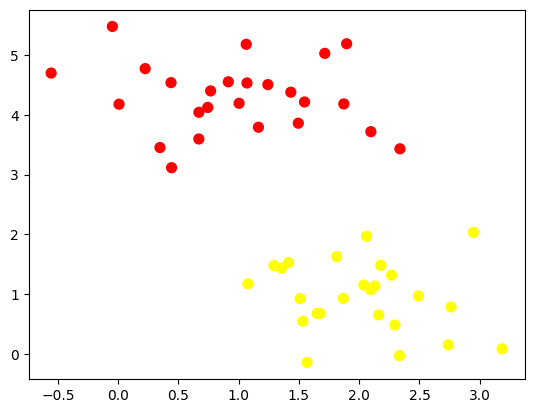

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

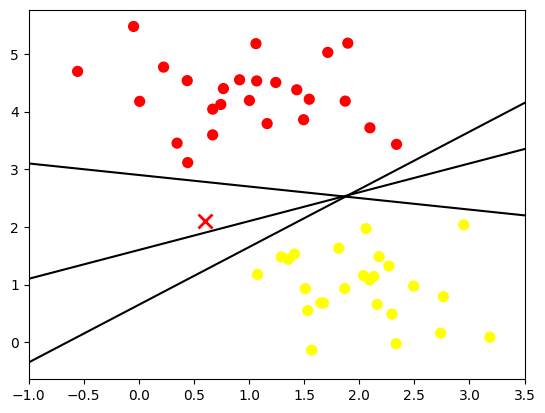

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

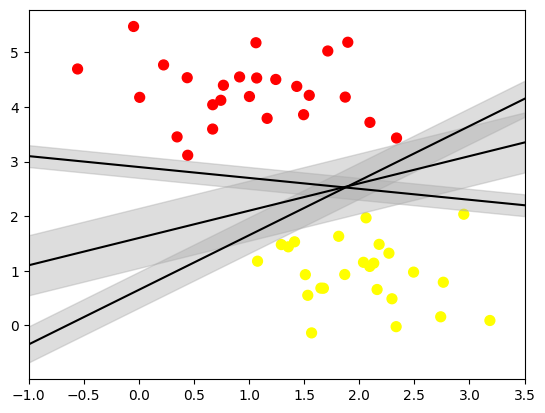

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Penerappan fitting SVM

Support Vectors:
[[0.59009904 2.96974544]
 [2.33812285 3.43116792]
 [0.83685684 2.13635938]]


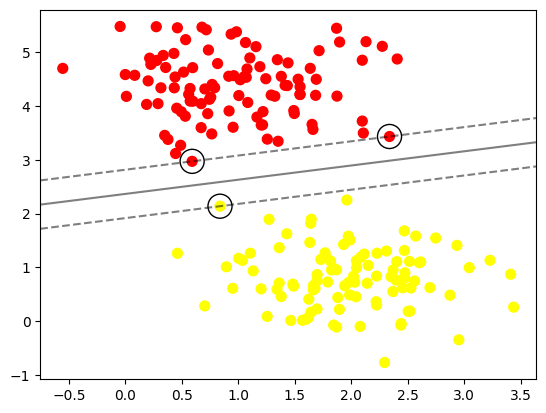

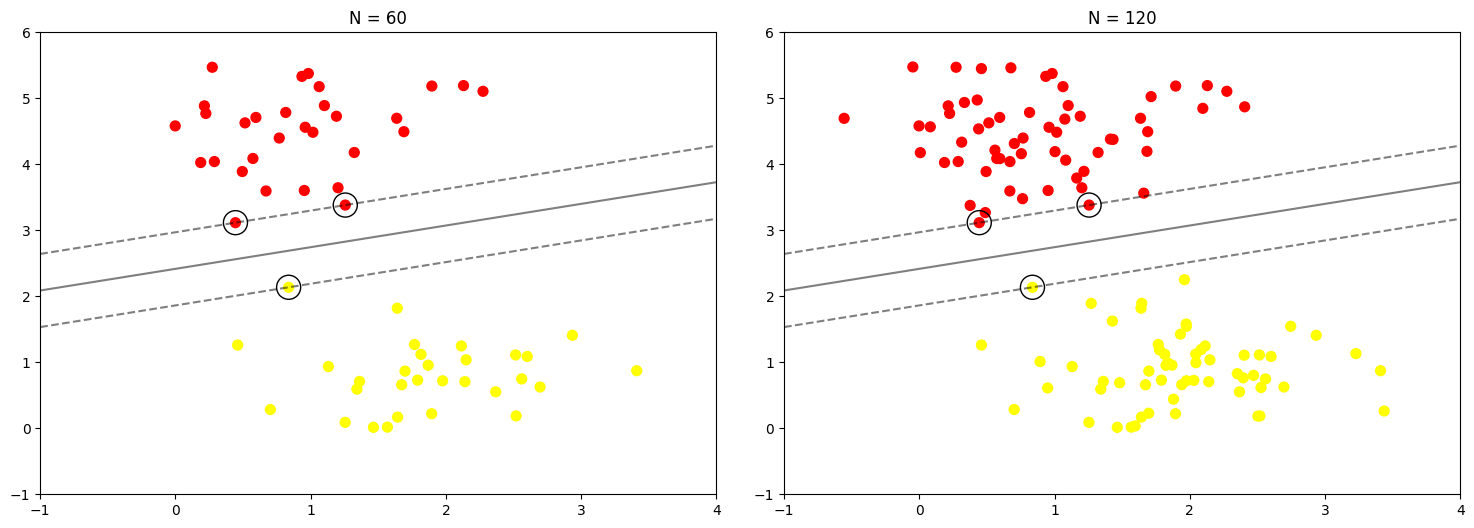

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Create a linear SVM model
model = SVC(kernel='linear', C=1E10)

# Function to plot the SVM decision function (boundaries and margins)
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()

    # Get the current limits of the plot
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Example data creation
X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)

# Fit the model on sample data
model.fit(X, y)

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

# Print support vectors
print("Support Vectors:")
print(model.support_vectors_)

# Plot function for varying the number of data points (N)
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]

    # Create and fit the model
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

# Create two subplots with different amounts of data
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Plot with different values of N (number of data points)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title(f'N = {N}')

# Show the plot
plt.show()


beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

Data Tidak Terpisah Secara Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

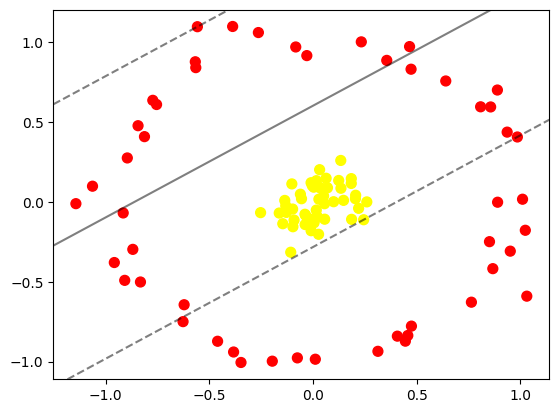

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

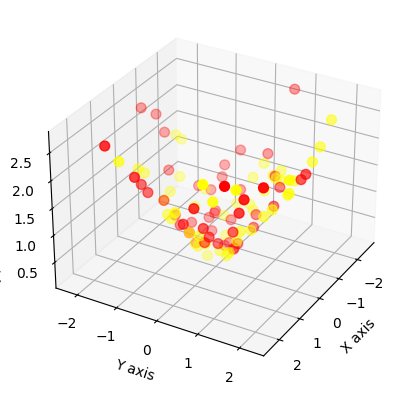

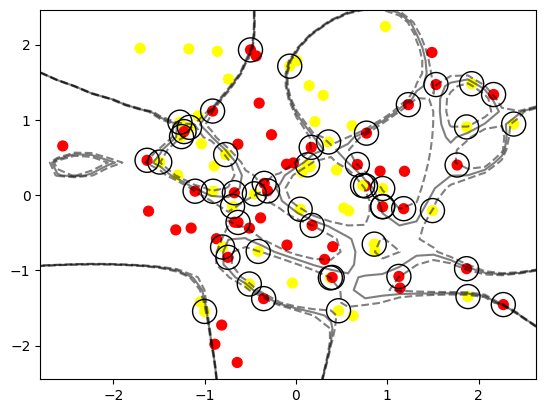

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed
from sklearn.svm import SVC

# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.choice([0, 1], size=100)

# Calculate radial distance from origin as the third dimension
r = np.sqrt((X ** 2).sum(1))

# 3D plot function
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Radial distance (r)')

# Create an interactive widget for controlling the plot angles
interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180), X=fixed(X), y=fixed(y))

# Fit an SVM model with an RBF kernel
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

# Function to plot the SVM decision boundary
def plot_svc_decision_function(clf, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                         np.linspace(ylim[0], ylim[1], 30))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# 2D scatter plot with decision boundary
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.show()


Data Overlap

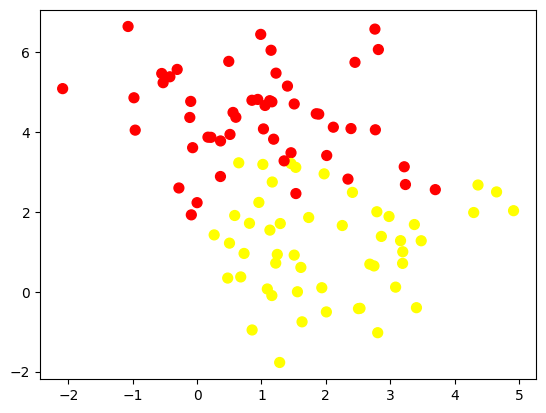

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.


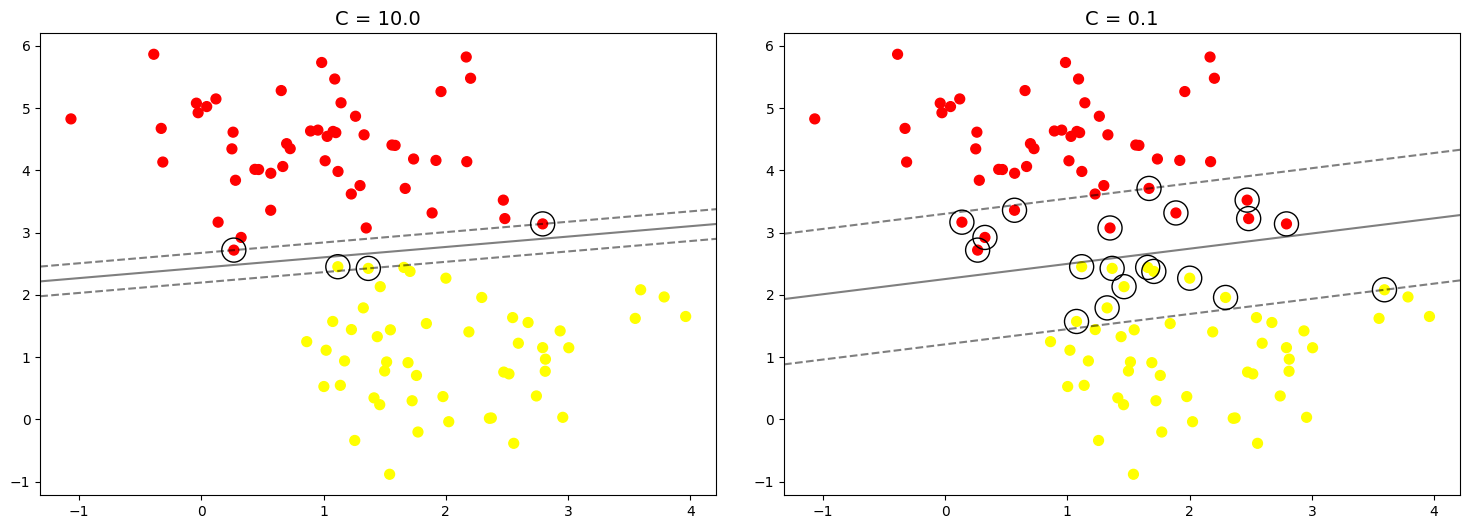

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)


**Praktikum 2**

**Klasifikasi SVM Pada Data Citra**

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


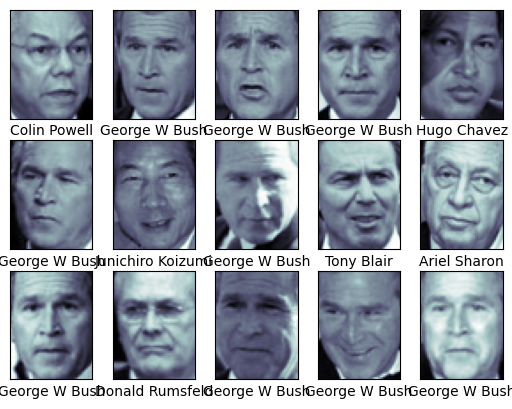

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)

# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 40s, sys: 26.2 s, total: 2min 7s
Wall time: 1min 27s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


prediksi label untuk data testing

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

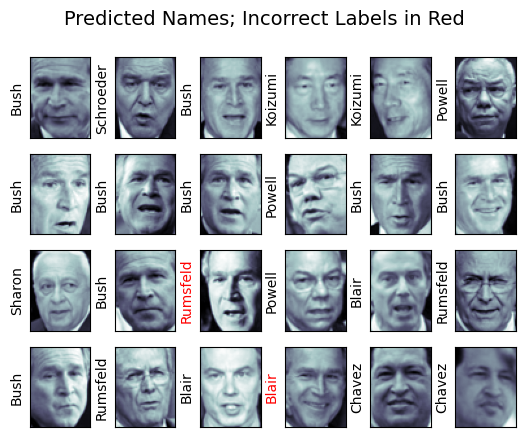

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

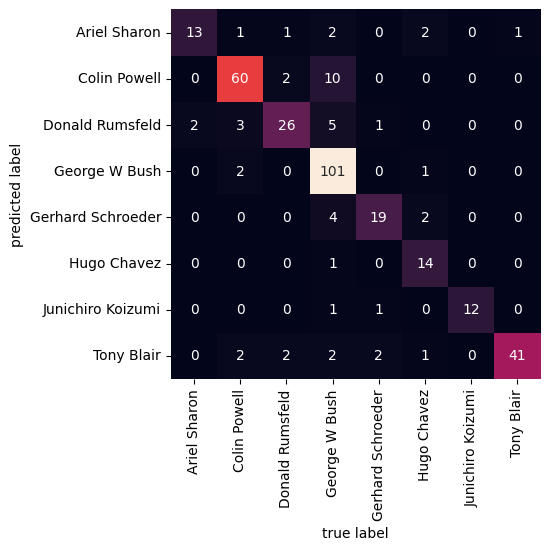

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Praktikum 3**

**Klasifikasi Naive Bayes dengan Data Dummy**

Mendefiniskan Data Dummy

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 60 110]
 [271 293]
 [ 45  80]
 [ 69   6]
 [227 225]
 [130 110]
 [114 129]
 [110 112]
 [101 141]
 [  4 134]
 [188 124]
 [309   8]
 [250  68]
 [ 76 142]
 [ 78 142]
 [415 100]
 [189  62]
 [ 25  54]
 [ 59 127]
 [237 113]
 [151  99]
 [113  91]
 [ 34 102]
 [ 17  26]
 [  4 200]
 [ 67  44]
 [ 98  50]
 [169  68]
 [ 84 155]
 [110 177]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


(Opsional) Membuat Data Frame

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,60,110,0
1,271,293,0
2,45,80,0
3,69,6,0
4,227,225,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,60,110,Kelas B
1,271,293,Kelas B
2,45,80,Kelas B
3,69,6,Kelas B
4,227,225,Kelas B


(Opsional) Visualisasi Data

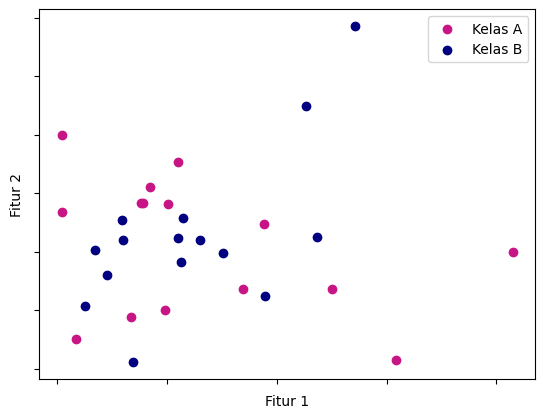

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Klasifikasi Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.6666666666666666


Klasifikasi Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7142857142857143
Hasil akurasi data test (Gaussian): 0.3333333333333333


**Praktikum 5**

**Klasifikasi Citra Siang dan Malam**

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

# Image directories
train_dir = "images/training/"
test_dir = "images/test/"



Langkah 1 - Load Data dan Visualisasikan

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


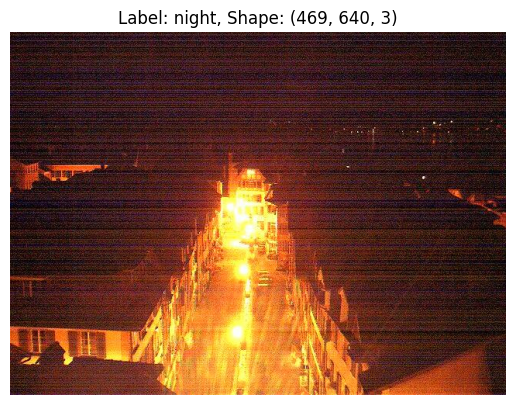

Image Shape: (469, 640, 3)
Label: night


In [12]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import numpy as np

# Image directories for night and day images
train_dir = "/content/drive/MyDrive/ML/images/training/"

# Function to load dataset from both 'night' and 'day' folders
def load_dataset(train_dir):
    p = Path(train_dir)

    img_list = []
    # Iterate through the 'night' and 'day' folders
    for folder in ['night', 'day']:
        folder_path = p / folder
        image_files = list(folder_path.glob('*.jpg'))  # List all .jpg files in the folder

        # Append each image and its label ('night' or 'day')
        for img_file in image_files:
            img = mpimg.imread(img_file)
            if img is not None:
                img_list.append((img, folder))  # Append image and its label based on folder name

    return img_list

# Load images from both 'night' and 'day' folders
image_data = load_dataset(train_dir)

# Check if images are found
if len(image_data) > 0:
    # Pick a random image from the list
    random_image_data = random.choice(image_data)
    random_img = random_image_data[0]  # The image array
    label = random_image_data[1]  # 'night' or 'day'

    # Get the shape of the image
    img_shape = random_img.shape

    # Show the image with its label and shape
    plt.imshow(random_img)
    plt.title(f'Label: {label}, Shape: {img_shape}')
    plt.axis('off')  # Turn off the axis
    plt.show()

    # Print additional info
    print(f"Image Shape: {img_shape}")
    print(f"Label: {label}")

else:
    print("No images found in the specified directories.")


Langkah 3 - Pra Pengolahan Data

In [14]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np

# Image directories for night and day images
train_dir = "/content/drive/MyDrive/ML/images/training/"

# Load dataset as previously defined
def load_dataset(train_dir):
    p = Path(train_dir)

    img_list = []
    for folder in ['night', 'day']:
        folder_path = p / folder
        image_files = list(folder_path.glob('*.jpg'))  # List all .jpg files in the folder

        for img_file in image_files:
            img = mpimg.imread(img_file)
            if img is not None:
                img_list.append((img, folder))  # Append image and its label based on folder name

    return img_list

# Function to standardize the input image (resize to w: 1100, h: 600)
def standardized_input(image):
    std_img = cv2.resize(image, (1100, 600))
    return std_img

# Label encoder function: 'day' -> 1, 'night' -> 0
def label_encoder(label):
    return 1 if label == 'day' else 0

# Preprocessing function to standardize images and encode labels
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        std_img = standardized_input(image)

        # Encode the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

# Load images from both 'night' and 'day' folders
train_img = load_dataset(train_dir)

# Standardize and preprocess the image list
train_std_img_list = preprocess(train_img)

# Check a random image size and label
pick_random = np.random.randint(0, len(train_std_img_list))

# Output the size and label
print(f"Image {pick_random} Size: {train_std_img_list[pick_random][0].shape}")
print(f"Image {pick_random} Label: {train_std_img_list[pick_random][1]} (1 = day, 0 = night)")


Image 92 Size: (600, 1100, 3)
Image 92 Label: 0 (1 = day, 0 = night)


Langkah 4 - Ekstraksi Fitur

Image 231
Avg Brighness: 139.7860


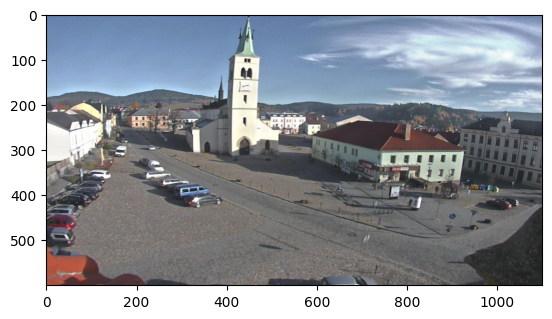

In [15]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Langkah 5 - Klasifikasi dengan Metode Threshold

Image 12
Actual label: 0
Predicted label: 0


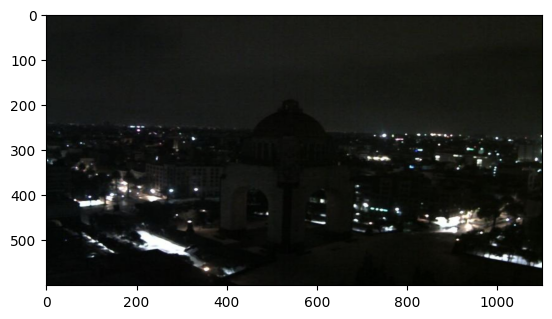

In [16]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

Langkah 6 - Evaluasi (Manual)

In [19]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

# Evaluate on train data
evaluate(train_std_img_list, threshold=120)


Accuracy: 0.8417


**Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM**

Langkah 4 alternatif - Membuat Feature Vectors

In [21]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (0, 2)


,AVG_BRIGHT,LABELS


In [22]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (0, 2)


,AVG_BRIGHT,LABELS


Langkah 5 alternatif

In [26]:
# Import Required Libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from pathlib import Path
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

# Load dataset function
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []

    for folder in ['night', 'day']:  # Load images from 'night' and 'day' folders
        folder_path = p / folder
        image_files = list(folder_path.glob('*.jpg'))

        for img_file in image_files:
            img = mpimg.imread(img_file)
            if img is not None:
                # Append image and label based on the folder name
                img_list.append((img, folder))
    return img_list

# Calculate average pixel value of the image for a simplified feature extraction
def calculate_avg_pixel_value(img_list):
    avg_img_data = []
    for item in img_list:
        image = item[0]
        label = item[1]

        # Calculate the average pixel value
        avg_pixel_value = np.mean(image)

        # Append average pixel value and the encoded label
        avg_img_data.append((avg_pixel_value, 1 if label == 'day' else 0))

    # Convert to pandas DataFrame
    avg_img_df = pd.DataFrame(avg_img_data, columns=['avg_pixel_value', 'label'])

    return avg_img_df

# Paths for training and test data
train_dir = "/content/drive/MyDrive/ML/images/training"
test_dir = "/content/drive/MyDrive/ML/images/test"

# Load and preprocess training data
train_img = load_dataset(train_dir)
train_avg_img = calculate_avg_pixel_value(train_img)

# Load and preprocess test data
test_img = load_dataset(test_dir)
test_avg_img = calculate_avg_pixel_value(test_img)

# Split data into features and labels
X_train = train_avg_img['avg_pixel_value'].values.reshape(-1, 1)
y_train = train_avg_img['label'].values
X_test = test_avg_img['avg_pixel_value'].values.reshape(-1, 1)
y_test = test_avg_img['label'].values

# Initialize and train the SVM model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Get the accuracy on training data
acc_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Evaluation Results
print(f'Accuracy on train data: {acc_train}')
print(f'Accuracy on test data: {acc_test}')


Accuracy on train data: 0.9333333333333333
Accuracy on test data: 0.96875


**Tugas 2**

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

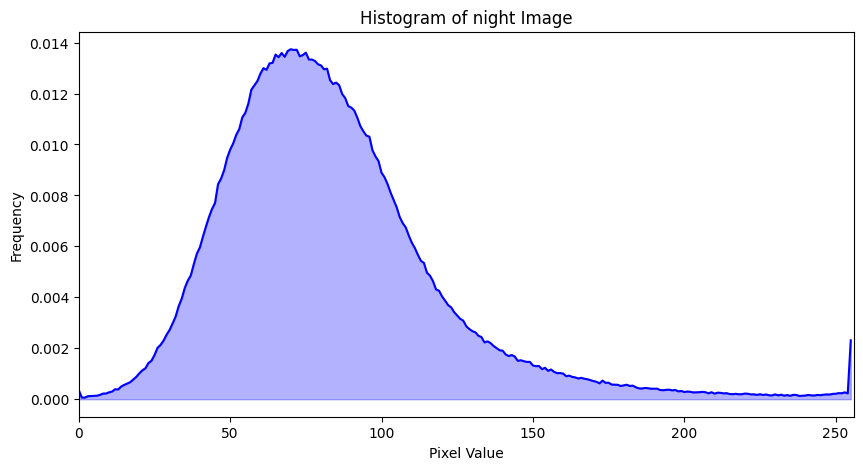

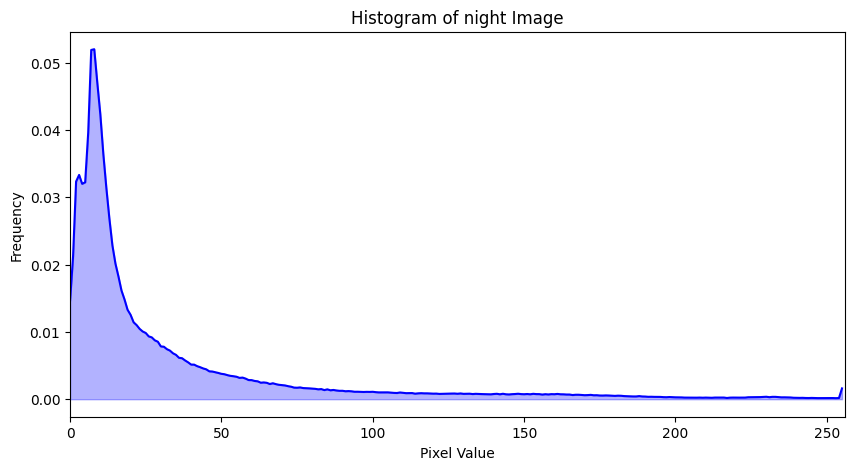

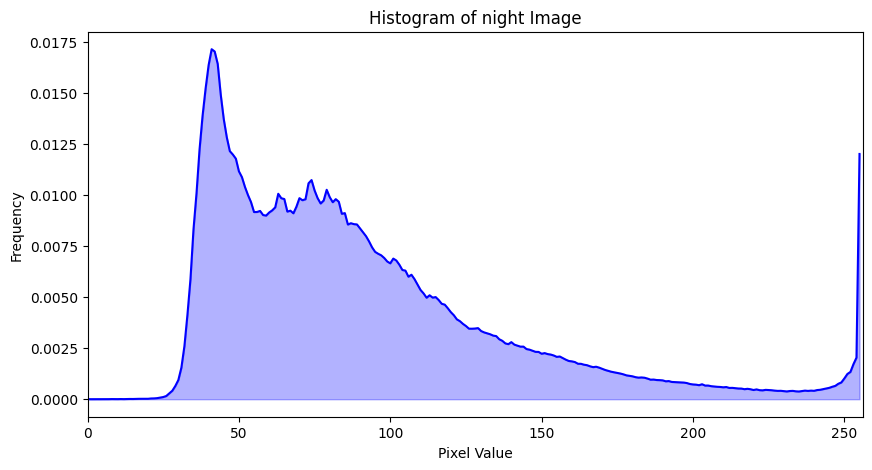

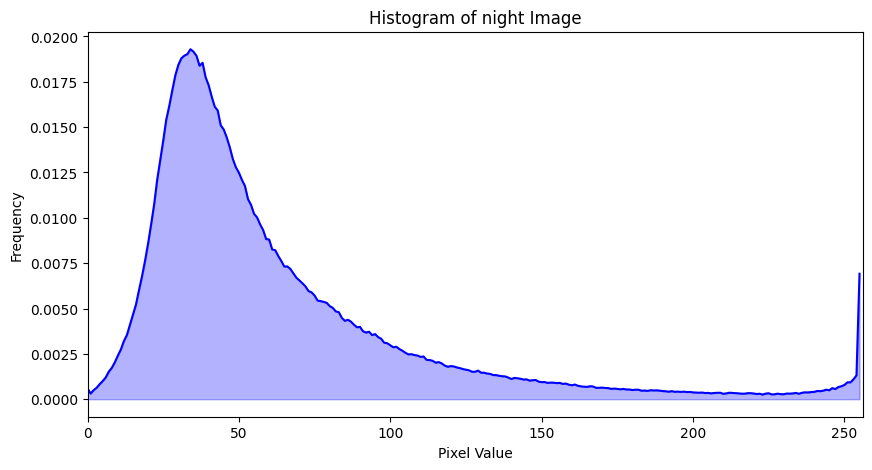

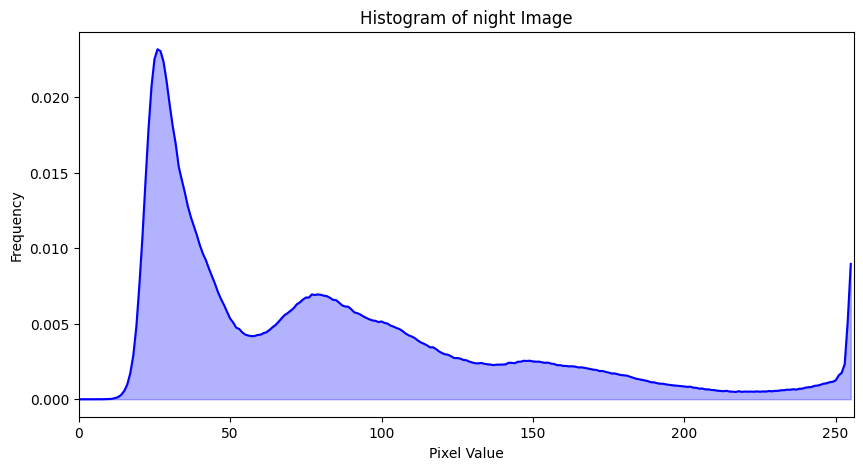

Accuracy on train data: 1.00
Accuracy on test data: 0.94


In [28]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from pathlib import Path

# Function to load dataset from directory
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []

    for folder in ['night', 'day']:  # Load images from 'night' and 'day' folders
        folder_path = p / folder
        image_files = list(folder_path.glob('*.jpg'))

        for img_file in image_files:
            img = mpimg.imread(img_file)
            if img is not None:
                img_list.append((img, folder))  # Append image and label based on the folder name
    return img_list

# Function to calculate histogram features for each image
def calculate_histogram_features(img_list):
    histogram_data = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Calculate histogram for the image
        hist, _ = np.histogram(image, bins=256, range=(0, 256))

        # Normalize the histogram
        hist = hist.astype("float")
        hist /= hist.sum()

        # Append histogram and the encoded label
        histogram_data.append((hist, 1 if label == 'day' else 0))

    # Convert to pandas DataFrame
    hist_df = pd.DataFrame(histogram_data, columns=['histogram', 'label'])

    return hist_df

# Function to visualize histogram
def visualize_histogram(histogram, label):
    plt.figure(figsize=(10, 5))
    plt.title(f'Histogram of {label} Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.plot(histogram, color='blue')
    plt.fill_between(range(256), histogram, alpha=0.3, color='blue')
    plt.show()

# Paths for training and test data
train_dir = "/content/drive/MyDrive/ML/images/training"
test_dir = "/content/drive/MyDrive/ML/images/test"

# Load and preprocess training data
train_img = load_dataset(train_dir)
train_histogram_df = calculate_histogram_features(train_img)

# Load and preprocess test data
test_img = load_dataset(test_dir)
test_histogram_df = calculate_histogram_features(test_img)

# Visualize histograms for a few training images
for i in range(5):  # Visualize first 5 images
    hist = train_histogram_df['histogram'].iloc[i]
    label = 'day' if train_histogram_df['label'].iloc[i] == 1 else 'night'
    visualize_histogram(hist, label)

# Prepare the data for SVM
X_train = np.array(train_histogram_df['histogram'].tolist())
y_train = train_histogram_df['label'].values
X_test = np.array(test_histogram_df['histogram'].tolist())
y_test = test_histogram_df['label'].values

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Get the accuracy on training data
acc_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Evaluation Results
print(f'Accuracy on train data: {acc_train:.2f}')
print(f'Accuracy on test data: {acc_test:.2f}')


In [38]:
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to html "drive/MyDrive/Colab Notebooks/ML-4_Klasifikasi.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook drive/MyDrive/Colab Notebooks/ML-4_Klasifikasi.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in c